In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.seed(1000)
import scipy.stats as scs
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import cvxopt as opt
from cvxopt import blas, solvers


import mpld3
from mpld3 import plugins



#np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False



In [3]:
!pip install mpld3

In [4]:
!pip install yfinance

In [5]:
import yfinance as yf
dta=yf.download ("AMZN XOM JPM SBUX V KO MSFT AAPL GOOG BAC KHC KHC WMT RDS MAR IBM NVDA MA PYPL INTC F TOT",start="2009-01-01",end="2019-12-31")

[*********************100%***********************]  21 of 21 completed


In [6]:
amazon=dta['Adj Close']['AMZN']
EXXOM=dta['Adj Close']['XOM']
JPMorgan=dta['Adj Close']['JPM']
Visa=dta['Adj Close']['V']
starbucks=dta['Adj Close']['SBUX']
cocacola=dta['Adj Close']['KO']
microsoft=dta['Adj Close']['MSFT']
apple=dta['Adj Close']['AAPL']
google=dta['Adj Close']['GOOG']
BankOfAmerica=dta['Adj Close']['BAC']
Walmart=dta['Adj Close']['WMT']
RoyalDutchShell=dta['Adj Close']['RDS']
Marriot=dta['Adj Close']['MAR']
IBM=dta['Adj Close']['IBM']
NVIDIA=dta['Adj Close']['NVDA']
Mastercard=dta['Adj Close']['MA']
Total=dta['Adj Close']['TOT']
Intel=dta['Adj Close']['INTC']
Ford=dta['Adj Close']['F']
data=pd.DataFrame(amazon.values,columns=['AMZN'])
data['AMZN']=amazon.values
data['XOM']=EXXOM.values
data['JPM']=JPMorgan.values
data['V']=Visa.values
data['SBUX']=starbucks.values
data['KO']=cocacola.values
data['MFST']=microsoft.values
data['AAPL']=apple.values
data['GOOG']=google.values
data['BAC']=BankOfAmerica.values
data['WMT']=Walmart.values
data['RDS']=RoyalDutchShell.values
data['MAR']=Marriot.values
data['IBM']=IBM.values
data['NVDA']=NVIDIA.values
data['MA']=Mastercard.values
data['TOT']=Total.values
data['INTC']=Intel.values
data['F']=Ford.values

In [7]:
data.head()

,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
0,51.279999,55.675411,23.811602,12.073921,3.993688,14.293343,14.909866,10.555326,153.250580,12.511642,42.436382,NaN,15.830873,59.010853,7.427460,13.421796,29.589779,10.296615,1.609636
1,54.360001,56.937794,23.964485,12.301816,4.154112,14.492252,15.592469,11.223147,160.060059,12.733791,43.284206,3.89,16.327370,61.261627,8.016504,14.065041,30.799044,10.675894,1.729129
2,54.060001,56.930786,22.359205,12.389291,4.187884,14.347014,15.738195,11.696809,163.412491,12.422776,42.784599,4.05,16.937811,60.875973,8.163763,14.391834,30.269320,10.472207,1.813477
3,57.360001,56.003220,22.840784,13.261746,4.314535,14.116528,15.922266,11.503882,166.406265,12.689362,42.406101,3.92,17.605228,62.565826,8.439878,15.214438,30.114136,10.795296,1.939998
4,56.200001,54.573521,21.472479,12.973997,4.217435,14.185989,14.963554,11.255305,160.403763,12.182853,42.042755,4.41,16.221558,61.556126,7.933669,14.293318,29.348984,10.142094,1.890795


In [8]:
price=data.dropna()

In [9]:
daily_returns=(data / data.shift(1)-1).dropna()
daily_returns

,AMZN,XOM,JPM,V,SBUX,KO,MFST,AAPL,GOOG,BAC,WMT,RDS,MAR,IBM,NVDA,MA,TOT,INTC,F
2,-0.005519,-0.000123,-0.066986,0.007111,0.008130,-0.010022,0.009346,0.042204,0.020945,-0.024424,-0.011542,0.041131,0.037388,-0.006295,0.018369,0.023234,-0.017199,-0.019079,0.048781
3,0.061043,-0.016293,0.021538,0.070420,0.030242,-0.016065,0.011696,-0.016494,0.018320,0.021459,-0.008847,-0.032099,0.039404,0.027759,0.033822,0.057158,-0.005127,0.030852,0.069767
4,-0.020223,-0.025529,-0.059906,-0.021698,-0.022505,0.004921,-0.060212,-0.021608,-0.036071,-0.039916,-0.008568,0.125000,-0.078594,-0.016138,-0.059978,-0.060543,-0.025408,-0.060508,-0.025362
5,0.017082,0.010734,-0.030972,-0.010646,0.015015,0.006900,0.031266,0.018569,0.009875,-0.012400,-0.074901,-0.061224,0.026092,-0.006948,-0.025522,0.004669,0.020419,0.007618,0.000000
6,-0.028866,-0.019219,-0.045922,-0.002511,-0.036489,-0.014147,-0.029821,-0.022869,-0.031120,-0.040620,0.003893,0.072464,-0.040098,-0.028447,-0.055952,-0.017934,-0.041629,-0.027491,-0.022305
7,-0.064673,-0.013278,-0.040816,-0.047824,-0.018424,-0.019506,-0.002562,-0.021197,-0.007554,-0.120092,-0.003683,-0.009009,-0.041773,0.011924,-0.040353,-0.013330,-0.016965,-0.025442,0.003802
8,-0.009052,0.018029,0.057808,0.003399,-0.022941,0.006631,0.017977,-0.010715,0.005213,-0.068241,0.014205,-0.065909,-0.024987,-0.004316,0.005256,0.016212,-0.014793,-0.008702,-0.060606
9,-0.057532,-0.036191,-0.016698,-0.040835,-0.035219,-0.031804,-0.036831,-0.027135,-0.042473,-0.042254,-0.010744,0.046229,-0.062159,-0.025194,-0.044445,-0.034167,-0.044273,-0.043160,-0.088710
10,0.060837,0.020772,-0.060595,-0.031195,0.026548,0.017363,0.007857,-0.022853,-0.006579,-0.184314,-0.004073,-0.058140,0.008139,0.011179,0.035568,-0.103235,-0.010272,0.016055,-0.013274
11,0.002916,0.018784,-0.062449,-0.039895,0.019397,0.011070,0.024428,-0.012593,0.002274,-0.137019,0.004090,0.044444,0.028835,0.009510,0.055482,-0.015963,0.010989,0.033860,-0.017938


In [10]:
#### This part of the code was taken from https://github.com/topics/markowitz-portfolio, accessed on 15 April 2020

return_vec = daily_returns.T



def convert_portfolios(portfolios):
    ''' Takes in a cvxopt matrix of portfolios, returns a list of portfolios '''
    port_list = []
    for portfolio in portfolios:
        temp = np.array(portfolio).T
        port_list.append(temp[0].tolist())
        
    return port_list


def optimal_portfolio(daily_returns):
    n = len(daily_returns)
    returns = np.asmatrix(daily_returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))  
    
  
    
    pbar = opt.matrix(np.mean(returns, axis=1))     #pbar is the mean return of each stock

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] #returns a list of objects
                  for mu in mus]

    port_list = convert_portfolios(portfolios)
    
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios] #np.sqrt returns the stdev, not variance
    
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    #print m1 # result: [ 159.38531535   -3.32476303    0.4910851 ]
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x'] #Is this the tangency portfolio? X1 = slope from origin?  

    return np.asarray(wt), returns, risks, port_list


weights, returns, risks, portfolios = optimal_portfolio(return_vec)


In [11]:
optimal_portfolio(daily_returns.T)

(array([[8.08154627e-01],
        [6.42355892e-07],
        [8.63903989e-07],
        [2.08743616e-06],
        [2.70141804e-06],
        [7.95986082e-07],
        [9.44587549e-07],
        [1.81638369e-06],
        [1.32553129e-06],
        [4.79670553e-07],
        [6.87522362e-07],
        [1.91785410e-01],
        [9.88984305e-07],
        [7.65758846e-07],
        [4.19071803e-05],
        [2.05180757e-06],
        [5.42020071e-07],
        [7.35271548e-07],
        [6.27297031e-07]]),
 [0.19192864751951608,
  0.17121401127730437,
  0.1527520544156537,
  0.1362977836355059,
  0.12163283046859297,
  0.10856303625275676,
  0.09691428847425247,
  0.08653189306582358,
  0.07727752651864041,
  0.0690286652462259,
  0.06167728549858689,
  0.05512522552808645,
  0.049285652324864766,
  0.044081118099968494,
  0.039442570204216806,
  0.03530845887842504,
  0.03162392702713288,
  0.028340082464256046,
  0.025413349474044906,
  0.02280488834596345,
  0.020480054885163367,
  0.01840758934387

In [12]:
a=optimal_portfolio(daily_returns.T)

In [13]:
weights=a[0]
allocations=weights.round(decimals=4, out=None)
allocations

array([[0.8082],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.1918],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ],
       [0.    ]])

In [14]:
portfolios

[[0.9306593463201343,
  1.826793549625634e-07,
  2.1232635498023836e-07,
  6.722600873118996e-07,
  2.0580990072385373e-06,
  2.021663315442876e-07,
  2.1674959800115927e-07,
  4.636398936576862e-07,
  2.6757932835695e-07,
  1.564333706201514e-07,
  1.8888848698510097e-07,
  0.06889080451678668,
  2.237481800910365e-07,
  1.9833914276045874e-07,
  0.0004436302902309508,
  6.330926748542736e-07,
  1.668637043845594e-07,
  1.956244155865013e-07,
  1.8038291666271463e-07],
 [0.9379343926616726,
  2.254944302054827e-07,
  2.5064626005322614e-07,
  7.040260377562868e-07,
  2.4840368926354838e-06,
  2.4121384117510377e-07,
  2.475909494146159e-07,
  4.6585523252964153e-07,
  2.6978255503104363e-07,
  1.9809744545894935e-07,
  2.3106405333967391e-07,
  0.06139942575852048,
  2.536171125577024e-07,
  2.3837666649377867e-07,
  0.0006590454964442785,
  6.566377442113579e-07,
  2.093336949194046e-07,
  2.370908272197429e-07,
  2.2321961975384149e-07],
 [0.9441272426057705,
  2.7308420388398006e-0

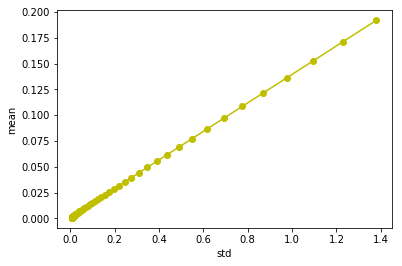

In [18]:
# Matplotlib only plot: 
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o') #risks and returns are just arrays of points along the frontier
plt.show()


# Interactive plot using mpld3:
def interactive_plot(risks, returns, portfolios):
    fig, ax = plt.subplots()
    ax.grid(True, alpha=0.3)


    labels = []
    for i in range(len(risks)):
        rounds = map(lambda x: round(x,3), portfolios[i])
        label = " Risk: " + str(risks[i]) + "<br>" + " Return: " + str(returns[i])  + "<br>" + " Portfolio Weights: " + str(rounds)
        labels.append(str(label))

    points = ax.plot(risks, returns, 'y-o', color='b',
                     mec='k', ms=15, mew=1, alpha=.6)

    ax.set_xlabel('standard deviation')
    ax.set_ylabel('return')
    ax.set_title('Efficient Frontier', size=20)

    tooltip = plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10)
    plugins.connect(fig, tooltip)

    return mpld3.display()


interactive_plot(risks, returns, portfolios)